# Dataset 

In [216]:
from sklearn.datasets import make_moons

# Generating 500 instances. 
# X are the generated instances, an array of shape (500,2).
# y are the labels of X, with values of either 0 or 1.

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

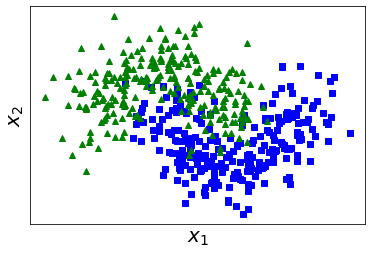

In [217]:
from matplotlib import pyplot as plt

# Visualizing the dataset.
# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
plt.xticks([])
plt.yticks([])

# Displaying the plot.
plt.show()

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Ensemble from Different Algorithms

## Hard Voting

In [223]:
# Creating three models with three different algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

tree_clf = DecisionTreeClassifier(random_state=42)
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

In [225]:
from sklearn.metrics import accuracy_score

for clf in (tree_clf, log_clf, svm_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.856
LogisticRegression 0.864
SVC 0.896


In [226]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('tree', tree_clf), ('log', log_clf)], 
                             voting='hard')

voting_clf.fit(X_train, y_train) # training
y_pred_voting = voting_clf.predict(X_test) # predicting
accuracy_score(y_test, y_pred_voting) # evaluating

0.904

## Soft Voting

In [227]:
# Out of the three models, 
# only SVC requires some tweaking to output its confidence
# this is done by setting probability=True:
svm_clf_tweaked = SVC(gamma='scale', probability=True, random_state=42)

soft_voting_clf = VotingClassifier(estimators=[('svm', svm_clf_tweaked), ('tree', tree_clf), ('log', log_clf)], 
                             voting='soft')

soft_voting_clf.fit(X_train, y_train) # training
y_pred_voting = soft_voting_clf.predict(X_test) # predicting
accuracy_score(y_test, y_pred_voting) # evaluating

0.912

# Bagging

In [236]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(SVC(gamma='scale', probability=True, random_state=42),
                                bootstrap=True, # set to False to use Pasting instead of Bagging
                                n_estimators=100, # number of SVC models to create
                                max_samples=100, # each model is trained from randomly sampled 100 instances 
                                random_state=42
                               )
bagging_clf.fit(X_train, y_train) # training
y_pred_bagging = bagging_clf.predict(X_test) # predicting
accuracy_score(y_test, y_pred_bagging) # evaluating

0.904